In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [4]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [7]:
df["hours"] = df["date_time_of_pickup"].dt.hour
df["min"] = df["date_time_of_pickup"].dt.minute
df["second"] = df["date_time_of_pickup"].dt.second
df["year"] = df["date_time_of_pickup"].dt.year
df["month"] = df["date_time_of_pickup"].dt.month
df["day_of_the_month"] = df["date_time_of_pickup"].dt.day

In [8]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hours,min,second,year,month,day_of_the_month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,26,21,2009,6,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,52,16,2010,1,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,35,0,2011,8,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,30,42,2012,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,51,0,2010,3,9


C:\Users\SREERA~1\AppData\Local\Temp/ipykernel_12496/3922083345.py:12: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  plt.imshow(plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true%27'), zorder = 0, extent = (-74.1, -73.7, 40.6, 40.85))


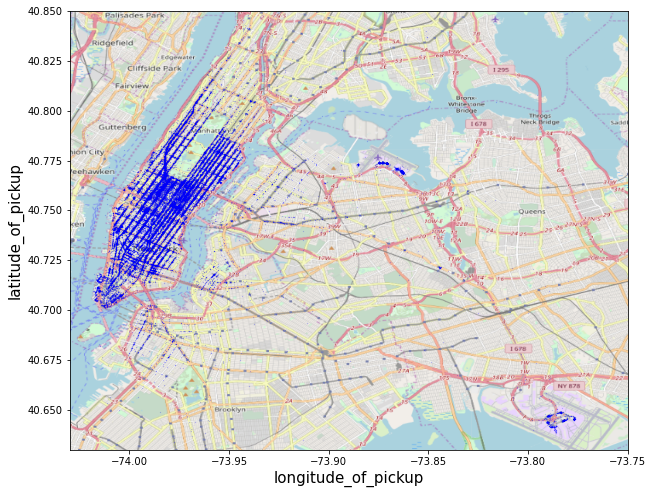

In [9]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df.plot(kind='scatter', x='longitude_of_pickup', y='latitude_of_pickup',
                color='blue', 
                s=.02, alpha=.6,figsize=(10,10))

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel("longitude_of_pickup",fontsize = 15)
plt.ylabel("latitude_of_pickup",fontsize = 15)
plt.imshow(plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true%27'), zorder = 0, extent = (-74.1, -73.7, 40.6, 40.85))

C:\Users\SREERA~1\AppData\Local\Temp/ipykernel_12496/2661565553.py:12: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  plt.imshow(plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true%27'), zorder = 0, extent = (-74.1, -73.7, 40.6, 40.85))


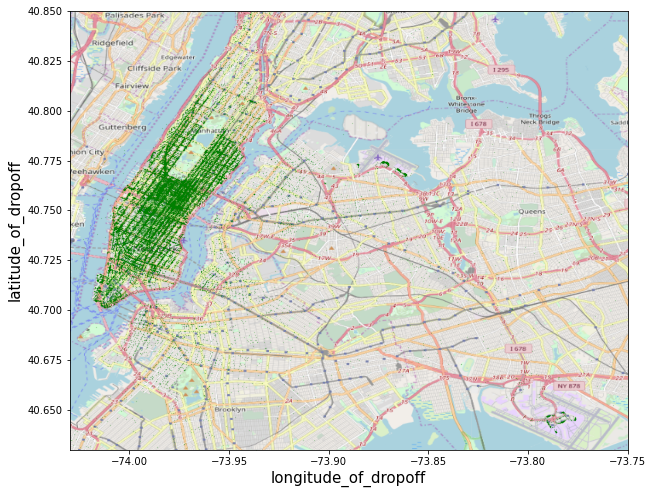

In [10]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df.plot(kind='scatter', x='longitude_of_dropoff', y='latitude_of_dropoff',
                color='green', 
                s=.02, alpha=.6,figsize=(10,10))

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel("longitude_of_dropoff",fontsize = 15)
plt.ylabel("latitude_of_dropoff",fontsize = 15)
plt.imshow(plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true%27'), zorder = 0, extent = (-74.1, -73.7, 40.6, 40.85))

C:\Users\SREE RAMULU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

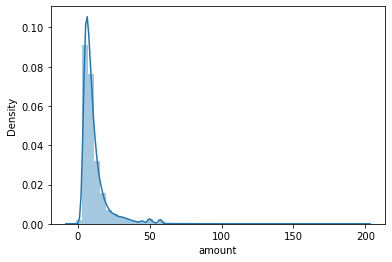

In [11]:
sns.distplot(df.amount)

### If we are using Regression model the amount should be normalized,but in the above it is not happend

C:\Users\SREE RAMULU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount'>

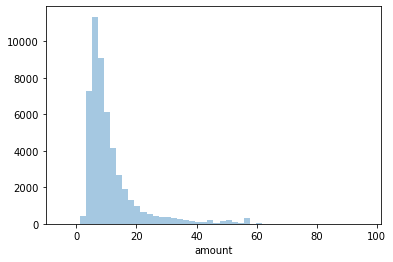

In [12]:
sns.distplot(df[df['amount']<100]['amount'],kde=False)

<AxesSubplot:xlabel='amount'>

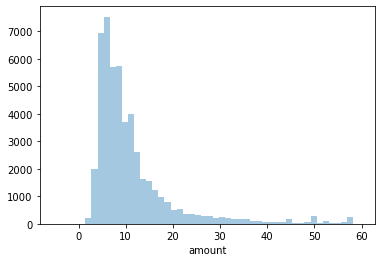

In [13]:
sns.distplot(df[df['amount']<60]['amount'],kde=False)

In [14]:
df=df.loc[df["amount"]>2.5]

Text(0, 0.5, 'Frequency')

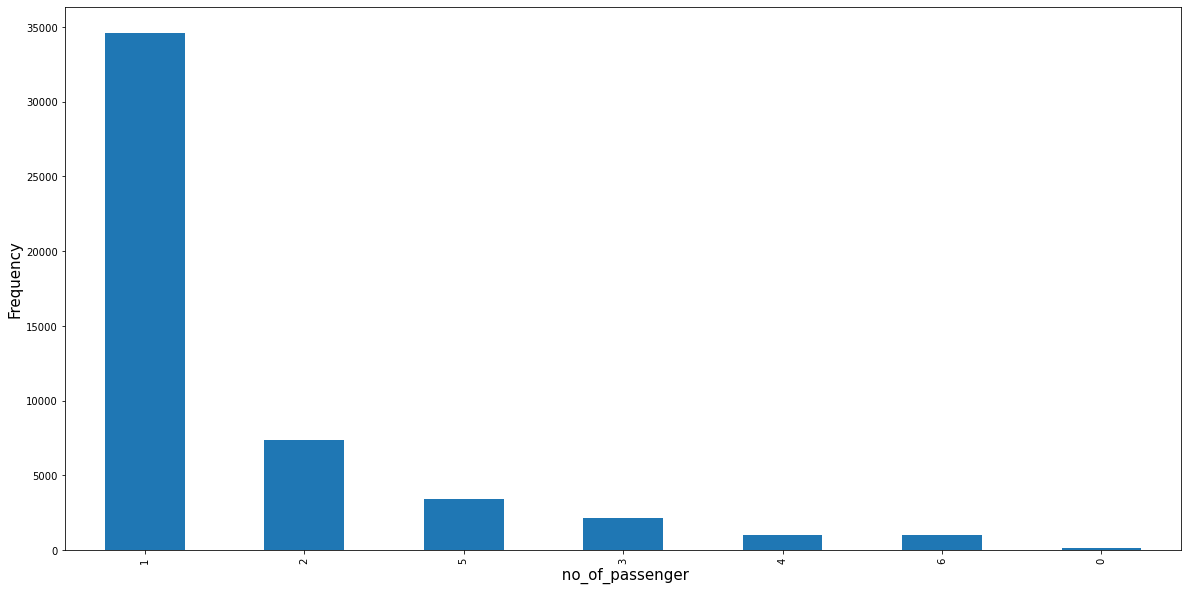

In [15]:
ax = df['no_of_passenger'].value_counts().plot.bar(figsize = (20,10))
ax.set_xlabel(" no_of_passenger",fontsize = 15)
ax.set_ylabel("Frequency",fontsize = 15)

### From the above plot, we see that most of the trips are single passenger trips.

Further, we notice a fairly noticeable amount of 0 passenger trips. These trips must be transporting objects, packages rather than passengers.


In [16]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

### For better  understand of data,i am splitting the time

In [17]:
df1 = df.copy()

In [18]:
df1["time_of_day"] = df1["hours"].apply(time_of_day)

In [19]:
df1["day"] = df1["date_time_of_pickup"].dt.day_name()
df1["day_no"] = df1["date_time_of_pickup"].dt.weekday

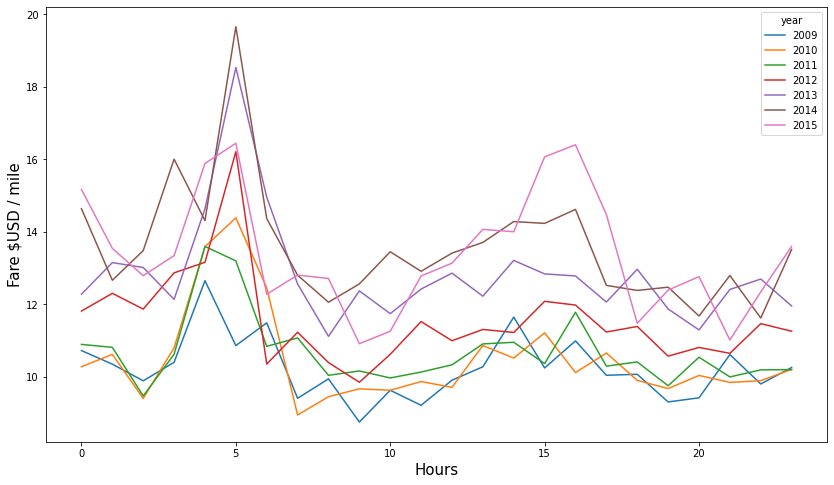

In [20]:
df.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('Fare $USD / mile',fontsize=(15))
plt.savefig('Fare $USD_mile.jpg')

### after observing the above graph we can conclude that 4 to 7 hours are the bussiness hours

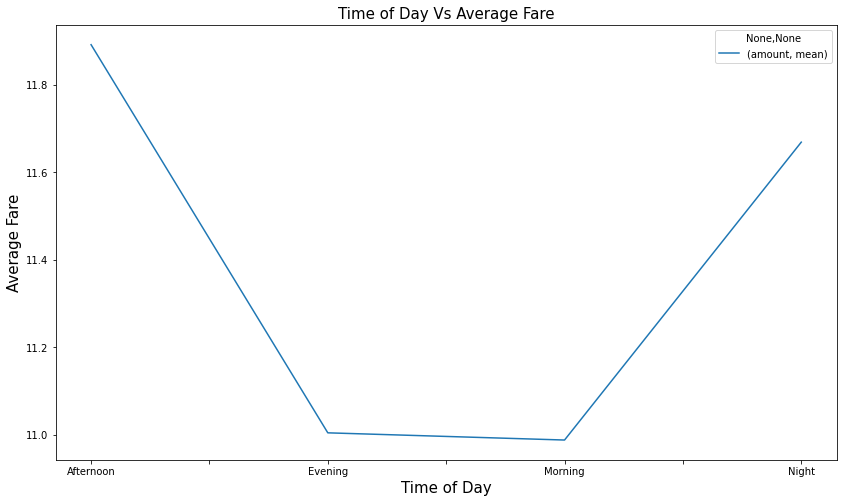

In [21]:
df1.groupby(df1["time_of_day"]).agg({"amount":["mean"]}).plot(figsize=(14,8))
plt.title("Time of Day Vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Time_of_Day_vs_Average_Fare.jpg")

### by seeing above graph ,we can say fare is higher in afternoon and evening times

Text(0, 0.5, 'amount')

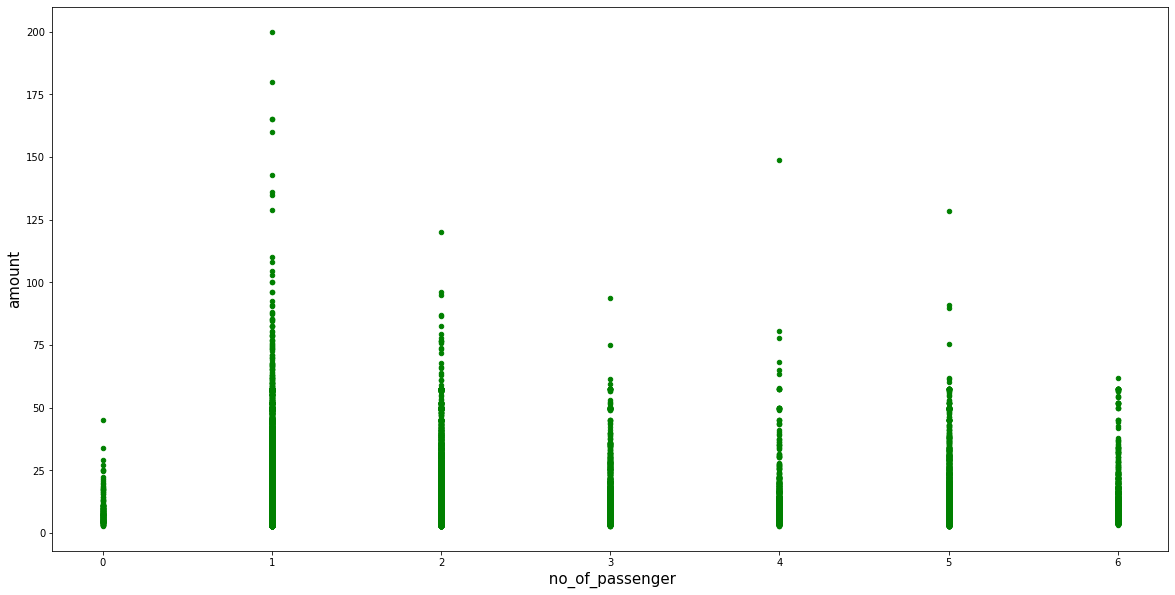

In [22]:
#Now let us check the correlation beteen passenger_count and fare_amount
ax = df.plot(kind = 'scatter',color = 'green', x = 'no_of_passenger', y='amount',figsize = (20,10))
ax.set_xlabel(" no_of_passenger",fontsize = 15)
ax.set_ylabel("amount",fontsize = 15)

### We notice from the above plot that the fare prices for 1 and 4 passenger rides are the highest.

There is a general decrease in the fare amount from then on with increasing passenger_count.


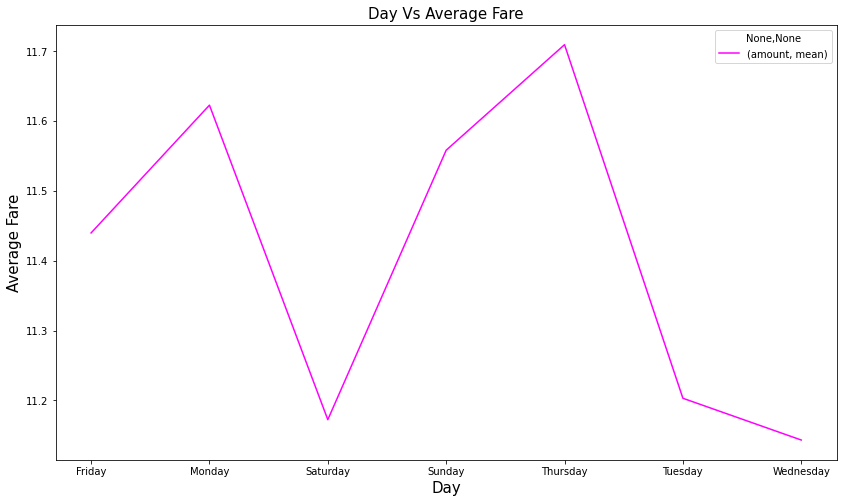

In [23]:
df1.groupby(df1["day"]).agg({"amount":["mean"]}).plot(figsize=(14,8),color="magenta")
plt.title("Day Vs Average Fare",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Day_vs_Average_Fare.jpg")

### by seeing the above graph we can say that the avg fare is  higher in thursday's and monday's  and less in tuesday's and saturday's

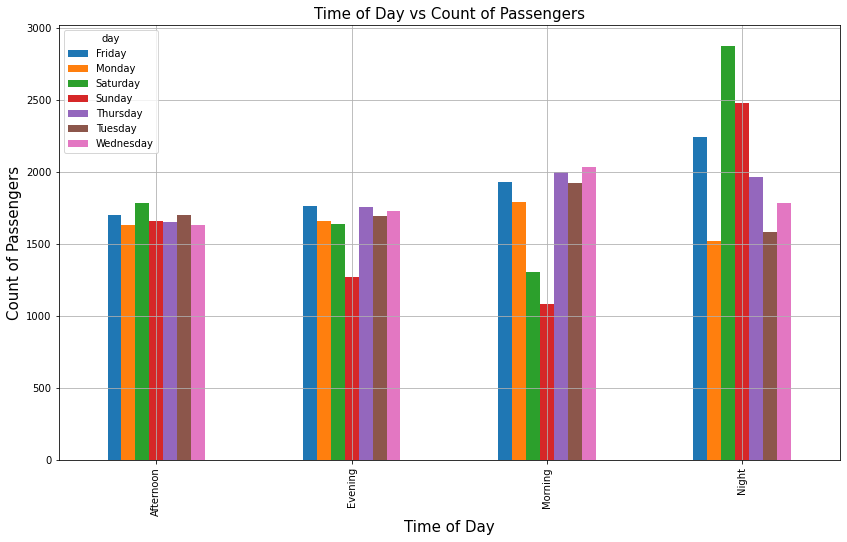

In [24]:
df1.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count").plot(figsize=(14,8),kind='bar')
plt.title("Time of Day vs Count of Passengers",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Time_of_Day_vs_Count_of_Passengers.jpg")

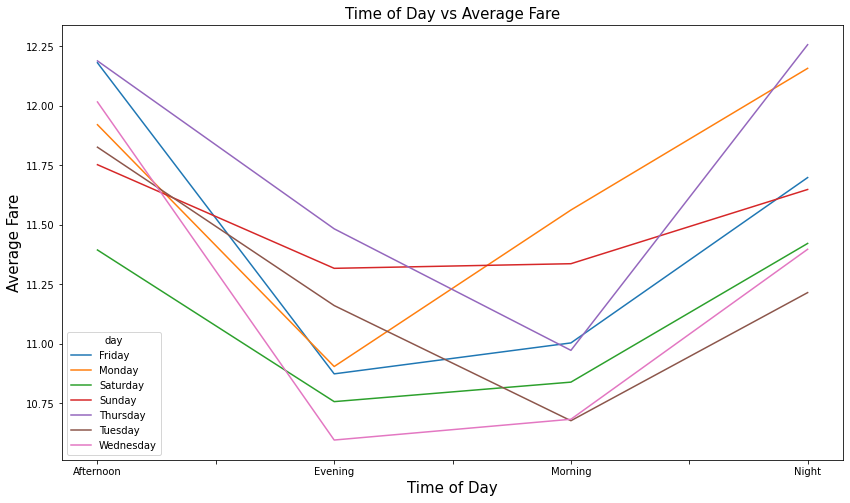

In [25]:
df1.pivot_table(index='time_of_day', columns='day', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.title("Time of Day vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Time_of_Day_vs_Average_Fare.jpg")

### in the above plot we can conclude that avg fare is higher in afternoon and night times

In [26]:
df["X1"] = df["latitude_of_pickup"]
df["X2"] = df["latitude_of_dropoff"]
df["Y1"] = df["longitude_of_pickup"]
df["Y2"] = df["longitude_of_dropoff"]

In [27]:
df["Distance_Travel"] = np.sqrt((np.square(df["X1"]-df["X2"]))+(np.square(df["Y1"]-df["Y2"])))

In [28]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hours,min,second,year,month,day_of_the_month,X1,X2,Y1,Y2,Distance_Travel
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,26,21,2009,6,15,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,52,16,2010,1,5,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,35,0,2011,8,18,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,30,42,2012,4,21,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,51,0,2010,3,9,40.768008,40.783762,-73.968095,-73.956655,0.019470


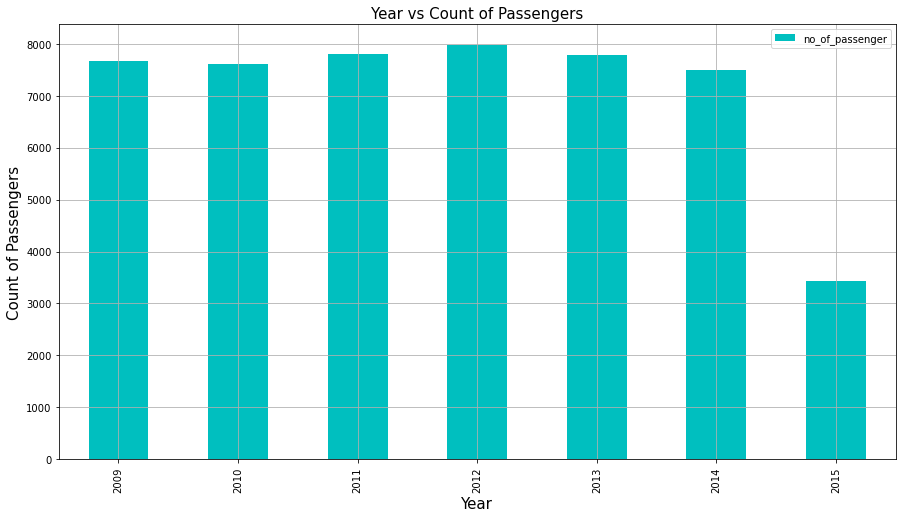

In [29]:
df.pivot_table(index="year",values= "no_of_passenger",aggfunc="count").plot(figsize=(15,8), kind='bar',color='c')
plt.title("Year vs Count of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Year vs Count of Passengers.jpg")

In [30]:
print(min(df['longitude_of_pickup'].min(),df['longitude_of_pickup'].min())) 

-75.42384832


In [31]:
print(max(df['longitude_of_dropoff'].max(),df['longitude_of_dropoff'].max()))

40.851027


In [32]:
print(min(df['latitude_of_pickup'].min(),df['latitude_of_pickup'].min()))

-74.006893


In [33]:
print(max(df['latitude_of_dropoff'].max(),df['latitude_of_dropoff'].max()))

43.41519


In [34]:
df=df.loc[df['Y1'].between(-75,-72)]
df=df.loc[df['X1'].between(40,42)]
df=df.loc[df['Y2'].between(-75,-72)]
df=df.loc[df['X2'].between(40,42)]
df=df.loc[df["no_of_passenger"]>0]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48613 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             48613 non-null  object             
 1   amount                48613 non-null  float64            
 2   date_time_of_pickup   48613 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   48613 non-null  float64            
 4   latitude_of_pickup    48613 non-null  float64            
 5   longitude_of_dropoff  48613 non-null  float64            
 6   latitude_of_dropoff   48613 non-null  float64            
 7   no_of_passenger       48613 non-null  int64              
 8   hours                 48613 non-null  int64              
 9   min                   48613 non-null  int64              
 10  second                48613 non-null  int64              
 11  year                  48613 non-null  int64              
 12  mont

In [36]:

columns=['date_time_of_pickup']
df.drop(columns,axis=1,inplace=True)

In [37]:
df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
hours                     int64
min                       int64
second                    int64
year                      int64
month                     int64
day_of_the_month          int64
X1                      float64
X2                      float64
Y1                      float64
Y2                      float64
Distance_Travel         float64
dtype: object

In [38]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hours,min,second,year,month,day_of_the_month,X1,X2,Y1,Y2,Distance_Travel
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,26,21,2009,6,15,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,52,16,2010,1,5,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,35,0,2011,8,18,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,30,42,2012,4,21,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,51,0,2010,3,9,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [39]:
columns=['unique_id','longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']
df.drop(columns,axis=1,inplace=True)

In [40]:
df.head()

,amount,no_of_passenger,hours,min,second,year,month,day_of_the_month,X1,X2,Y1,Y2,Distance_Travel
0,4.5,1,17,26,21,2009,6,15,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,16.9,1,16,52,16,2010,1,5,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,5.7,2,0,35,0,2011,8,18,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,7.7,1,4,30,42,2012,4,21,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,5.3,1,7,51,0,2010,3,9,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [41]:
df.dtypes

amount              float64
no_of_passenger       int64
hours                 int64
min                   int64
second                int64
year                  int64
month                 int64
day_of_the_month      int64
X1                  float64
X2                  float64
Y1                  float64
Y2                  float64
Distance_Travel     float64
dtype: object

In [42]:
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,train_size=0.14,random_state=1)

In [44]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
reg.score(x_train,y_train)

0.7382026122026002

In [46]:
reg.score(x_test,y_test)

0.704262131864446

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [48]:
xScaled =x.apply(zscore)
xScaled.describe()

,no_of_passenger,hours,min,second,year,month,day_of_the_month,X1,X2,Y1,Y2,Distance_Travel
count,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04
mean,1.819628e-15,1.032574e-16,-6.440997e-17,2.677436e-15,2.253825e-14,-3.690984e-16,2.912403e-16,4.235711e-14,3.271909e-14,9.010732e-14,-4.492279e-13,6.659328e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-5.242460e-01,-2.074408e+00,-1.713678e+00,-8.153450e-01,-1.468031e+00,-1.524713e+00,-1.693414e+00,-2.051308e+01,-1.748657e+01,-1.870728e+01,-2.033326e+01,-8.261203e-01
25%,-5.242460e-01,-6.903063e-01,-8.470864e-01,-8.153450e-01,-9.325401e-01,-9.468515e-01,-8.850819e-01,-4.761068e-01,-4.670444e-01,-4.337518e-01,-4.489547e-01,-5.161195e-01
50%,-5.242460e-01,7.863925e-02,1.950558e-02,-6.092609e-01,1.384413e-01,-8.005882e-02,3.872638e-02,7.533168e-02,7.515947e-02,-1.750178e-01,-1.670108e-01,-3.017055e-01
75%,2.511098e-01,8.475848e-01,8.860976e-01,8.333281e-01,6.739320e-01,7.867339e-01,8.470586e-01,5.426955e-01,5.031759e-01,1.730601e-01,2.259410e-01,1.112554e-01
max,3.352533e+00,1.462741e+00,1.694917e+00,2.224396e+00,1.744913e+00,1.653527e+00,1.770867e+00,2.929127e+01,2.359496e+01,2.840796e+01,2.912178e+01,2.545475e+01


In [49]:
x_train,x_test,y_train,y_test=train_test_split(xScaled,y,test_size=0.3,random_state=2)

In [50]:
NNH=KNeighborsRegressor(n_neighbors=7)

In [51]:
NNH.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [52]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test, y_test)

0.7628406370146367

In [53]:
NNH.score(x_train,y_train)

0.7950799913983739

In [54]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, reg.coef_[0][idcoff]))

The coefficient for no_of_passenger is 0.0024700356664723003
The coefficient for hours is -0.002683791568614142
The coefficient for min is 0.0004893968800600902
The coefficient for second is 0.0033063771008640264
The coefficient for year is 0.5399572490393498
The coefficient for month is 0.060718290763510825
The coefficient for day_of_the_month is -0.006487869024138718
The coefficient for X1 is 4.881635933324167
The coefficient for X2 is -21.368539426111806
The coefficient for Y1 is 11.714841541491804
The coefficient for Y2 is 4.25058828773327
The coefficient for Distance_Travel is 203.74782341674523


In [55]:
intercept = reg.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 770.7521354007179


In [57]:
ridge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
print('Ridge model:',(ridge.coef_))

Ridge model: [[ 6.32744493e-02  6.72951499e-02 -3.86705240e-02 -5.89905576e-03
   1.08638071e+00  2.88719914e-01 -2.27182188e-03 -8.34977868e-01
  -4.82755146e-01  4.47701547e-01  4.90988315e-01  6.85258173e+00]]


In [58]:
ridge.score(x_train,y_train)
ridge.score(x_test,y_test)

0.7410645214108804

In [59]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print('Lasso model:',(lasso.coef_))

Lasso model: [ 0.          0.         -0.         -0.          0.97553905  0.17690743
 -0.         -0.75726347 -0.38652361  0.37586682  0.38669283  6.84082486]


In [60]:
lasso.score(x_train,y_train)
lasso.score(x_test,y_test)

0.7391875125090009